In [1]:
import pandas as pd
import numpy as np

In [2]:
churn_pred=pd.read_csv("Churn_Modelling.csv",na_values=["?",",","#","unknown"])

In [3]:
churn_pred.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_pred.shape

(10000, 14)

In [5]:
churn_pred.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# EDA

In [6]:
 import seaborn as sns

0    7963
1    2037
Name: Exited, dtype: int64
Percentage of people who have churned: 0.0 %


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


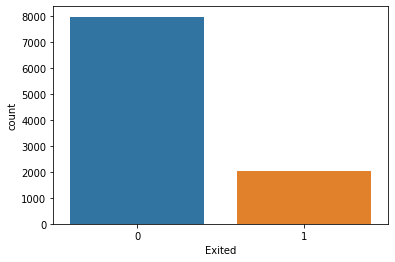

In [7]:
# Plot Distribution
sns.countplot(x='Exited',data=churn_pred)


# What are the counts?
print(churn_pred.Exited.value_counts())

# What is the percentage?
count_yes = len(churn_pred[churn_pred.Exited == 'yes'])
count_no = len(churn_pred[churn_pred.Exited != 'yes'])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people who have churned:', percent_success, "%")

In [8]:
churn_pred.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Exited        0    1
Geography           
France     4204  810
Germany    1695  814
Spain      2064  413


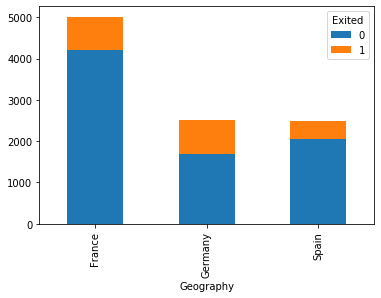

In [9]:
counts= churn_pred.groupby(['Geography','Exited']).Exited.count().unstack()
counts.plot(kind='bar',stacked=True)
print(counts)

Exited    0    1
Tenure          
0       318   95
1       803  232
2       847  201
3       796  213
4       786  203
5       803  209
6       771  196
7       851  177
8       828  197
9       771  213
10      389  101


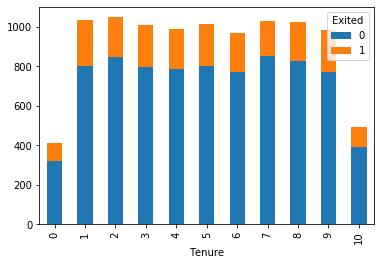

In [10]:
c= churn_pred.groupby(['Tenure','Exited']).Exited.count().unstack()
c.plot(kind='bar',stacked=True)
print(c)

Exited              0       1
NumOfProducts                
1              3675.0  1409.0
2              4242.0   348.0
3                46.0   220.0
4                 NaN    60.0


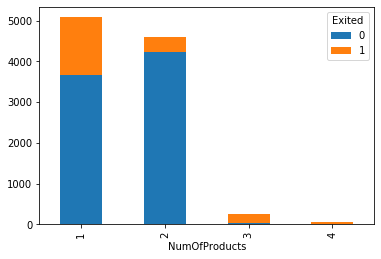

In [11]:
v= churn_pred.groupby(['NumOfProducts','Exited']).Exited.count().unstack()
v.plot(kind='bar',stacked=True)
print(v)

Exited        0     1
HasCrCard            
0          2332   613
1          5631  1424


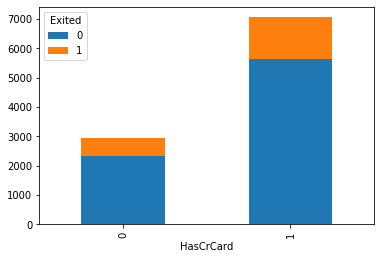

In [12]:
z= churn_pred.groupby(['HasCrCard','Exited']).Exited.count().unstack()
z.plot(kind='bar',stacked=True)
print(z)

Exited             0     1
IsActiveMember            
0               3547  1302
1               4416   735


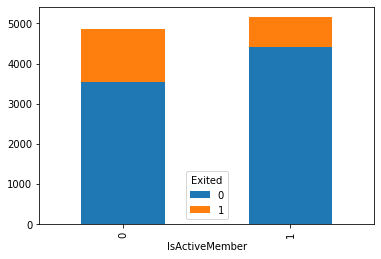

In [13]:
b= churn_pred.groupby(['IsActiveMember','Exited']).Exited.count().unstack()
b.plot(kind='bar',stacked=True)
print(b)

Exited     0     1
Gender            
Female  3404  1139
Male    4559   898


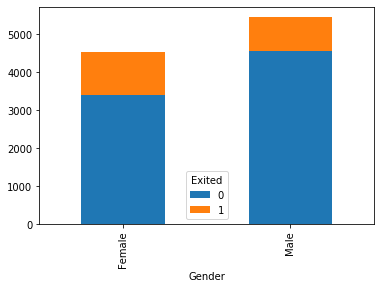

In [14]:
t= churn_pred.groupby(['Gender','Exited']).Exited.count().unstack()
t.plot(kind='bar',stacked=True)
print(t)

In [15]:
churn_pred.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
churn_pred.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [17]:
churn_pred['HasCrCard']=churn_pred['HasCrCard'].astype('object')

churn_pred['IsActiveMember']=churn_pred['IsActiveMember'].astype('object')



In [18]:
num_columns=churn_pred.select_dtypes(include=['int64','float64'])

In [19]:
num_columns.shape

(10000, 9)

In [20]:
num_columns.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,113931.57,1
3,4,15701354,699,39,1,0.00,2,93826.63,0
4,5,15737888,850,43,2,125510.82,1,79084.10,0


In [21]:
cat_columns=churn_pred.select_dtypes(include=['object'])

In [22]:
cat_columns.shape

(10000, 5)

In [23]:
cat_columns.head()

,Surname,Geography,Gender,HasCrCard,IsActiveMember
0,Hargrave,France,Female,1,1
1,Hill,Spain,Female,0,1
2,Onio,France,Female,1,0
3,Boni,France,Female,0,0
4,Mitchell,Spain,Female,1,1


In [24]:
num_columns.drop(['RowNumber','CustomerId'],axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
cat_columns.drop(['Surname'],axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
num_columns.shape

(10000, 7)

In [27]:
cat_columns.shape

(10000, 4)

In [28]:
churn_pred.shape

(10000, 14)

In [29]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
for i in cat_columns:
    le1.fit(cat_columns[i])
    cat_columns[i] = le1.transform(cat_columns[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
cat_columns.head(10)

,Geography,Gender,HasCrCard,IsActiveMember
0,0,0,1,1
1,2,0,0,1
2,0,0,1,0
3,0,0,0,0
4,2,0,1,1
5,2,1,1,0
6,0,1,1,1
7,1,0,1,0
8,0,1,0,1
9,0,1,1,1


In [33]:
churn_final=pd.concat([num_columns,cat_columns],axis=1)

In [34]:
churn_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography,Gender,HasCrCard,IsActiveMember
0,619,42,2,0.00,1,101348.88,1,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,2,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,2,0,1,1


In [35]:
churn_final.shape

(10000, 11)

In [36]:
X = churn_final.loc[:,churn_final.columns!='Exited'].values
Y = churn_final.loc[:,'Exited'].values
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (10000, 10)
Y.shape:  (10000,)


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [39]:
from xgboost import XGBClassifier

In [40]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix

In [41]:
XGB = XGBClassifier(n_jobs=-1)

param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100,50,30],
     'max_depth': [10, 15,5]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [42]:
CV_XGB.fit(X = X_train, y=y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': array([0.5, 0.9]),
                         'max_depth': [10, 15, 5],
                         'n_estimators': [100, 50,

In [43]:
y_train_xg_pred_CV=CV_XGB.predict(X_train)
y_val_xg_pred_CV=CV_XGB.predict(X_test)

In [44]:
confusion_matrix_test_CV = confusion_matrix(y_test,y_val_xg_pred_CV)
confusion_matrix_train_CV = confusion_matrix(y_train, y_train_xg_pred_CV)

In [46]:
Accuracy_Train=(confusion_matrix_train_CV[0,0]+confusion_matrix_train_CV[1,1])/(confusion_matrix_train_CV[0,0]+confusion_matrix_train_CV[0,1]+confusion_matrix_train_CV[1,0]+confusion_matrix_train_CV[1,1])
TNR_Train= confusion_matrix_train_CV[0,0]/(confusion_matrix_train_CV[0,0]+confusion_matrix_train_CV[0,1])
TPR_Train= confusion_matrix_train_CV[1,1]/(confusion_matrix_train_CV[1,0]+confusion_matrix_train_CV[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9800646551724138
Train TPR:  0.513268156424581
Train Accuracy:  0.8845714285714286


In [48]:

Accuracy_Test=(confusion_matrix_test_CV[0,0]+confusion_matrix_test_CV[1,1])/(confusion_matrix_test_CV[0,0]+confusion_matrix_test_CV[0,1]+confusion_matrix_test_CV[1,0]+confusion_matrix_test_CV[1,1])
TNR_Test= confusion_matrix_test_CV[0,0]/(confusion_matrix_test_CV[0,0] +confusion_matrix_test_CV[0,1])
TPR_Test= confusion_matrix_test_CV[1,1]/(confusion_matrix_test_CV[1,0] +confusion_matrix_test_CV[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.964509394572025
Test TPR:  0.49421487603305786
Test Accuracy:  0.8696666666666667


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
parameters = {'n_neighbors':list(range(2,10))}

knn = GridSearchCV(KNeighborsClassifier(algorithm = 'auto', metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=10)

knn.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    8.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [52]:
print(knn.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')


In [54]:
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

In [55]:
confusion_matrix_test_stack = confusion_matrix(y_test,knn_pred_test)
confusion_matrix_train_stack= confusion_matrix(y_train, knn_pred_train)

In [56]:
Accuracy_Train=(confusion_matrix_train_stack[0,0]+confusion_matrix_train_stack[1,1])/(confusion_matrix_train_stack[0,0]+confusion_matrix_train_stack[0,1]+confusion_matrix_train_stack[1,0]+confusion_matrix_train_stack[1,1])
TNR_Train= confusion_matrix_train_stack[0,0]/(confusion_matrix_train_stack[0,0]+confusion_matrix_train_stack[0,1])
TPR_Train= confusion_matrix_train_stack[1,1]/(confusion_matrix_train_stack[1,0]+confusion_matrix_train_stack[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9926364942528736
Train TPR:  0.06634078212290503
Train Accuracy:  0.8031428571428572


In [58]:
Accuracy_Test=(confusion_matrix_test_stack[0,0]+confusion_matrix_test_stack[1,1])/(confusion_matrix_test_stack[0,0]+confusion_matrix_test_stack[0,1]+confusion_matrix_test_stack[1,0]+confusion_matrix_test_stack[1,1])
TNR_Test= confusion_matrix_test_stack[0,0]/(confusion_matrix_test_stack[0,0] +confusion_matrix_test_stack[0,1])
TPR_Test= confusion_matrix_test_stack[1,1]/(confusion_matrix_test_stack[1,0] +confusion_matrix_test_stack[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9824634655532359
Test TPR:  0.03305785123966942
Test Accuracy:  0.791


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}

scores = ['precision', 'recall']

In [61]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5)
CV_rfc.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [62]:
print(CV_rfc.best_score_, CV_rfc.best_params_)

0.854 {'max_depth': 7, 'min_samples_leaf': 2, 'n_estimators': 45}


In [63]:
rf_train_pred=CV_rfc.predict(X_train)
rf_test_pred=CV_rfc.predict(X_test)

In [64]:
confusion_matrix_test_RF = confusion_matrix(y_test,rf_test_pred)
confusion_matrix_train_RF= confusion_matrix(y_train, rf_train_pred)

In [65]:
Accuracy_Train=(confusion_matrix_train_RF[0,0]+confusion_matrix_train_RF[1,1])/(confusion_matrix_train_RF[0,0]+confusion_matrix_train_RF[0,1]+confusion_matrix_train_RF[1,0]+confusion_matrix_train_RF[1,1])
TNR_Train= confusion_matrix_train_RF[0,0]/(confusion_matrix_train_RF[0,0]+confusion_matrix_train_RF[0,1])
TPR_Train= confusion_matrix_train_RF[1,1]/(confusion_matrix_train_RF[1,0]+confusion_matrix_train_RF[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9838362068965517
Train TPR:  0.4085195530726257
Train Accuracy:  0.8661428571428571


In [66]:
Accuracy_Test=(confusion_matrix_test_RF[0,0]+confusion_matrix_test_RF[1,1])/(confusion_matrix_test_RF[0,0]+confusion_matrix_test_RF[0,1]+confusion_matrix_test_RF[1,0]+confusion_matrix_test_RF[1,1])
TNR_Test= confusion_matrix_test_RF[0,0]/(confusion_matrix_test_RF[0,0] +confusion_matrix_test_RF[0,1])
TPR_Test= confusion_matrix_test_RF[1,1]/(confusion_matrix_test_RF[1,0] +confusion_matrix_test_RF[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.978705636743215
Test TPR:  0.40165289256198344
Test Accuracy:  0.8623333333333333


In [67]:
 from sklearn.linear_model import LogisticRegression

In [68]:
Logistic_model=LogisticRegression(random_state=0)

In [69]:
Logistic_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
logistic_train_pred=Logistic_model.predict(X_train)
logistic_test_pred=Logistic_model.predict(X_test)

In [71]:
confusion_matrix_test_logit = confusion_matrix(y_test,logistic_test_pred)
confusion_matrix_train_logit= confusion_matrix(y_train, logistic_train_pred)

In [72]:
Accuracy_Train=(confusion_matrix_train_logit[0,0]+confusion_matrix_train_logit[1,1])/(confusion_matrix_train_logit[0,0]+confusion_matrix_train_logit[0,1]+confusion_matrix_train_logit[1,0]+confusion_matrix_train_logit[1,1])
TNR_Train= confusion_matrix_train_logit[0,0]/(confusion_matrix_train_logit[0,0]+confusion_matrix_train_logit[0,1])
TPR_Train= confusion_matrix_train_logit[1,1]/(confusion_matrix_train_logit[1,0]+confusion_matrix_train_logit[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.9872485632183908
Train TPR:  0.039804469273743016
Train Accuracy:  0.7934285714285715
